# Dados da exportação de vinhos do Brasil dos últimos 15 anos

O Brasil é o terceiro país maior país em termo de quantidade de produção e exportação da América do Sul, perdendo para a Argentina e para o Chile.
O nosso propósito, é levantar algumas hipóteses e apresentar soluções para aumentarmos o volume de exportação. Podemos tomar como exemplo, nossos vizinhos da América do Sul (Chile e Argentina) que estão a frente do Brasil em volume de produção, exportação e superfície plantada. O que de fato influencia essa disparidade? Podemos aumentar nossa produção/exportação se adequarmos nossa tecnologia de acordo com a utilizada por nossos vizinhos.

Para avaliarmos essa disparidade, podemos analisar:
* Dados Climáticos
* Dados Demográficos
* Dados Econômicos
* Dados de avaliação de vinhos


### Nesse primeiro momento, vamos analisar a produção nos últimos 15 anos

Fonte:
* International Organisation of Vine and Wine
* The scientific and technical reference of the vine and wine world
* https://www.oiv.int/ 



import pandas as pd

In [8]:
import pandas as pd
dados = pd.read_excel('dados/data.xlsx', skipfooter=2)

/home/marco/anaconda3/lib/python3.9/site-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [9]:
dados.sample(5)

,Continent,Region/Country,Product,Variable,Year,Unit,Quantity
41,America,Brazil,Wine,Exports,2013,1000 hl,91
86,America,Chile,Wine,Exports,2020,1000 hl,8498
42,America,Brazil,Wine,Production,2013,1000 hl,2710
58,America,Brazil,Wine,Production,2021,1000 hl,2928
11,America,Argentina,Wine,Production,2013,1000 hl,14984


In [4]:
# Retirando a coluna Continent
# dados.drop('Continent', axis=1, inplace=True)
dados = dados.rename(columns={'Region/Country':'Country'})

In [5]:
producao = dados.query('Variable == "Production"')
exportacao = dados.query('Variable == "Exports"')

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

# Análise da Produção em 1000 hl (hectolitros)

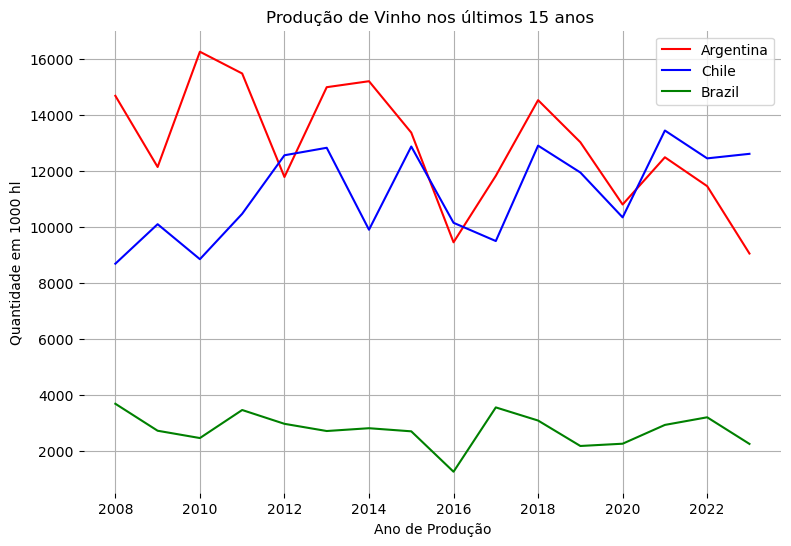

In [7]:
# Analisando e comparando a produção entre os 3 países

plt.figure(figsize=(9,6))
sns.lineplot(data=producao.query('Country == "Argentina"'), x = 'Year', y = 'Quantity', color="red", label = "Argentina")
sns.lineplot(data=producao.query('Country == "Chile"'), x = 'Year', y = 'Quantity', color="blue", label = "Chile")
sns.lineplot(data=producao.query('Country == "Brazil"'), x = 'Year', y = 'Quantity', color="green", label="Brazil")
plt.legend()
plt.xlabel('Ano de Produção')
plt.ylabel('Quantidade em 1000 hl')
plt.title("Produção de Vinho nos últimos 15 anos ")
plt.grid()
plt.box(False)
plt.show()



In [172]:
producao_pivot = producao.pivot(index = 'Year', columns='Country')['Quantity']


In [185]:
producao_pivot['Argentina_x_Brazil'] = round(producao_pivot['Argentina'] / producao_pivot['Brazil'], 2)
producao_pivot['Chile_x_Brazil'] = round(producao_pivot['Chile'] / producao_pivot['Brazil'], 2)

print(round(producao_pivot['Argentina_x_Brazil'].mean(), 2))
print(round(producao_pivot['Chile_x_Brazil'].mean(), 2))      


4.85
4.31


# Análise da Exportação em 1000 hl (hectolitro)

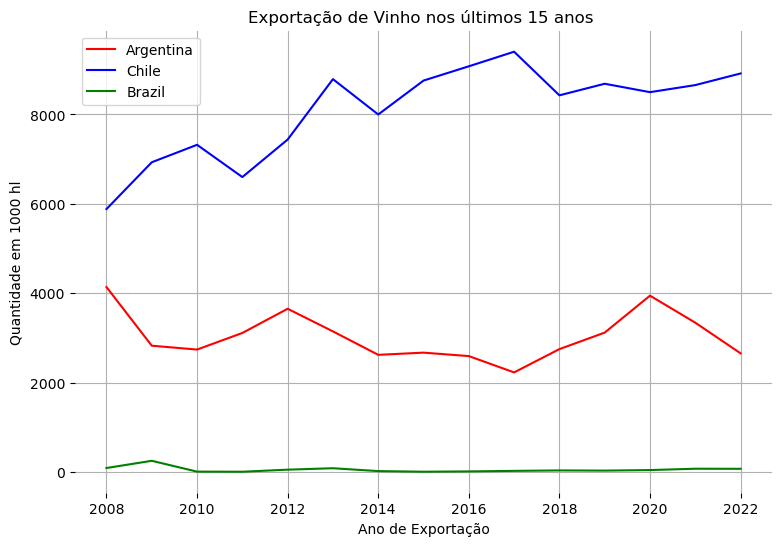

In [79]:
# Analisando e comparando a produção entre os 3 países

plt.figure(figsize=(9,6))
sns.lineplot(data=exportacao.query('Country == "Argentina"'), x = 'Year', y = 'Quantity', color="red", label = "Argentina")
sns.lineplot(data=exportacao.query('Country == "Chile"'), x = 'Year', y = 'Quantity', color="blue", label = "Chile")
sns.lineplot(data=exportacao.query('Country == "Brazil"'), x = 'Year', y = 'Quantity', color="green", label="Brazil")
plt.legend()
plt.xlabel('Ano de Exportação')
plt.ylabel('Quantidade em 1000 hl')
plt.title("Exportação de Vinho nos últimos 15 anos ")
plt.grid()
plt.box(False)
plt.show()


In [179]:
exportacao_pivot = exportacao.pivot(index = 'Year', columns='Country')['Quantity']

In [186]:
exportacao_pivot['Argentina_x_Brazil'] = round(exportacao_pivot['Argentina'] / exportacao_pivot['Brazil'], 2)
exportacao_pivot['Chile_x_Brazil'] = round(exportacao_pivot['Chile'] / exportacao_pivot['Brazil'], 2)

print(round(exportacao_pivot['Argentina_x_Brazil'].mean(), 2))
print(round(exportacao_pivot['Chile_x_Brazil'].mean(), 2))      

# exportacao_pivot


91.91
256.39


# Análise da Área Plantada em hectares

In [88]:
area_vinhedo = pd.read_excel('dados/data_vineyard.xlsx', skipfooter=2) 

/home/marco/anaconda3/lib/python3.9/site-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [89]:
area_vinhedo.drop('Continent', axis=1, inplace=True)

In [92]:
area_vinhedo.rename(columns={"Region/Country":"Country"}, inplace=True)
area_vinhedo.head()

,Country,Product,Variable,Year,Unit,Quantity
0,Argentina,Vineyard,Surface Area,2008,ha,226450
1,Argentina,Vineyard,Surface Area,2009,ha,229000
2,Argentina,Vineyard,Surface Area,2010,ha,217751
3,Argentina,Vineyard,Surface Area,2011,ha,219476
4,Argentina,Vineyard,Surface Area,2012,ha,221909


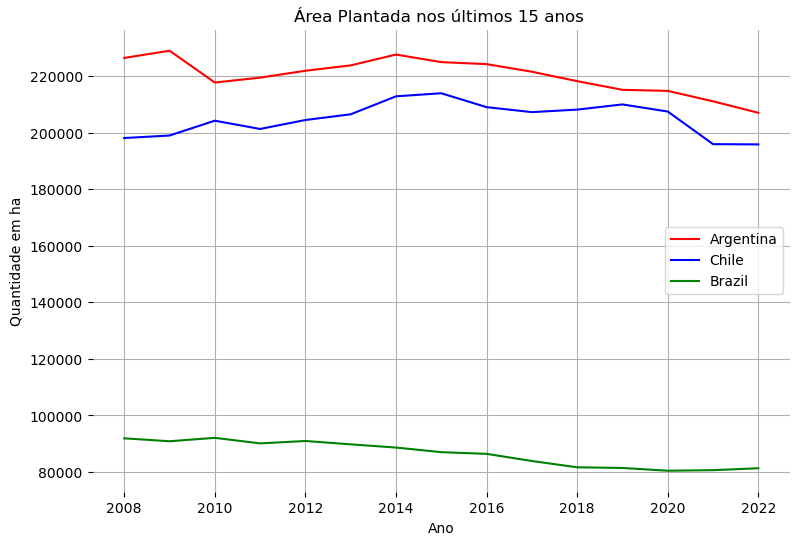

In [94]:
# Analisando e comparando a produção entre os 3 países

plt.figure(figsize=(9,6))
sns.lineplot(data=area_vinhedo.query('Country == "Argentina"'), x = 'Year', y = 'Quantity', color="red", label = "Argentina")
sns.lineplot(data=area_vinhedo.query('Country == "Chile"'), x = 'Year', y = 'Quantity', color="blue", label = "Chile")
sns.lineplot(data=area_vinhedo.query('Country == "Brazil"'), x = 'Year', y = 'Quantity', color="green", label="Brazil")
plt.legend()
plt.xlabel('Ano')
plt.ylabel('Quantidade em ha')
plt.title("Área Plantada nos últimos 15 anos ")
plt.grid()
plt.box(False)
plt.show()

In [167]:
area_vinhedo_pivot = area_vinhedo.pivot(index = 'Year', columns='Country')['Quantity']

In [168]:
area_vinhedo_pivot['Argentina_x_Brazil'] = round(area_vinhedo_pivot['Argentina'] / area_vinhedo_pivot['Brazil'], 2)
area_vinhedo_pivot['Chile_x_Brazil'] = round(area_vinhedo_pivot['Chile'] / area_vinhedo_pivot['Brazil'], 2)  


In [187]:
print(round(area_vinhedo_pivot['Argentina_x_Brazil'].mean(), 2)) 
print(round(area_vinhedo_pivot['Chile_x_Brazil'].mean(), 2))

2.55
2.38


### Deduções iniciais:

De acordo com os dados iniciais, obtidos dos últimos 15 anos na fonte International Organisation of Vine and Wine, fizemos uma comparação entre os 3 maiores produtores/exportadores de vinho da América do Sul.

    * Produção:
        * Chile produz em média 4.31 vezes mais que o Brasil
        * Argentina produz em média 4.85 vezes mais que o Brasil
        
    * Area plantada:
        * Chile tem uma area plantada em média 2.38 vezes maior que o Brasil
        * Argentina tem uma area plantada em média 2.55 vezes maior que o Brasil
        
    * Exportação:
        * Chile exporta em média 256.39 vezes mais que o Brasil
        * Argentina exporta em média 91.91 vezes mais que o Brasil
        
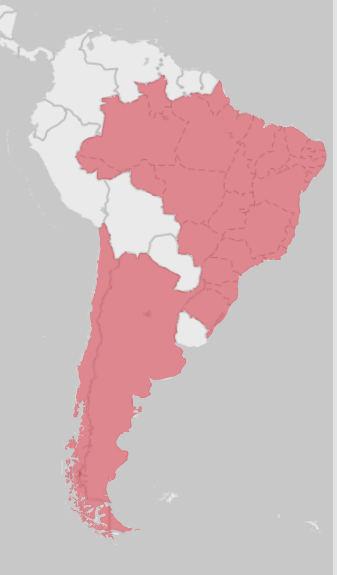        


# Análise de Dados Climáticos

A importância do clima para a produção de um bom vinho

Existem cinco aspectos climáticos a serem considerados no momento de produzir um vinho: temperatura, luz solar, chuvas, amplitude térmica e altitude.

As regiões vinícolas que recebem uma maior quantidade de luz solar e são mais quentes tendem a produzir vinhos tintos de acidez moderada e maior teor alcoólico. Já as vinícolas de clima frio são aquelas que produzem vinhos brancos ou verdes, mais refrescantes, de acidez elevada e menor teor alcoólico.

As uvas necessitam de luz solar e calor para seu amadurecimento. Quanto mais elevados esses índices, menor é o nível de acidez e maior o nível de açúcar. É por isso que cada região climática produz variedades de vinhos tão diferentes.
Dica de leitura:  10 vinhos de até R$ 40

Para se desenvolver, as videiras também precisam de chuvas. O ideal é que elas sejam moderadas e distribuídas durante todo o ano, embora algumas variedades de uva prefiram mais ou menos água.

Chuvas fortes no período da colheita prejudicam a qualidade das uvas, fazendo com que os níveis de açúcar sejam menores e causando fungos indesejados.

A grande amplitude térmica, ou seja, a variação da temperatura ao longo do dia, pode beneficiar o cultivo das uvas, com temperaturas mais quentes favorecendo o amadurecimento durante o dia e temperaturas mais frias à noite, permitindo que a fruta descanse.

Devido ao impacto da amplitude térmica, as regiões vinícolas de clima quente se localizam em terrenos de maior altitude, garantindo que as noites sejam frias e que haja equilíbrio perfeito na temperatura ao longo do dia.

Fonte: https://www.wine.com.br/winepedia/curiosidades/mudancas-de-clima-impactam-na-producao-de-vinho/


<img src="https://s2-umsoplaneta.glbimg.com/hcKUmYp15FSNeRkgPOC5ELDNP0s=/0x0:500x315/984x0/smart/filters:strip_icc()/i.s3.glbimg.com/v1/AUTH_7d5b9b5029304d27b7ef8a7f28b4d70f/internal_photos/bs/2022/T/O/hBgWpoSVu4oRTLBZsveA/biomas-interna.jpg" />


Base de dados com informações climáticas
http://dadosclima.ccst.inpe.br/registar/
* Dados do INPE (aguardando liberação dos dados para continuar análise ......)